# 数据集预处理

In [1]:
import urllib.request
import os

In [2]:
url="http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"
filepath="titanic3.xls"
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)

In [3]:
import numpy as np
import pandas as pd

In [5]:
all_df=pd.read_excel(filepath)

In [6]:
all_df[:2]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
clos=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
all_df=all_df[clos]

In [8]:
all_df[:2]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S


In [13]:
df = all_df.drop(['name'],axis=1)

In [14]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [15]:
age_mean=df['age'].mean()
df['age']=df['age'].fillna(age_mean)

In [16]:
fare_mead=df['fare'].mean()
df['fare']=df['fare'].fillna(fare_mead)

In [17]:
df['sex']=df['sex'].map({'female':0,'male':1}).astype(int)

In [18]:
x_OneHot_df=pd.get_dummies(data=df,columns=['embarked'])

In [19]:
x_OneHot_df[:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1


In [20]:
ndarray=x_OneHot_df.values
ndarray.shape

(1309, 10)

In [21]:
ndarray[:2]

array([[  1.    ,   1.    ,   0.    ,  29.    ,   0.    ,   0.    ,
        211.3375,   0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,   1.    ,   0.9167,   1.    ,   2.    ,
        151.55  ,   0.    ,   0.    ,   1.    ]])

In [22]:
Label=ndarray[:,0]
Features=ndarray[:,1:]

In [23]:
Label[:2]

array([1., 1.])

In [24]:
Features[:2]

array([[  1.    ,   0.    ,  29.    ,   0.    ,   0.    , 211.3375,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,   0.9167,   1.    ,   2.    , 151.55  ,
          0.    ,   0.    ,   1.    ]])

In [25]:
from sklearn import preprocessing

In [26]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

In [27]:
scaledFeatures=minmax_scale.fit_transform(Features)

In [28]:
scaledFeatures[:2]

array([[0.        , 0.        , 0.36116884, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.00939458, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

In [29]:
np.random.seed(20)

In [30]:
msk=np.random.rand(len(all_df))<0.8

In [31]:
train_df=all_df[msk]
test_df=all_df[~msk]

In [32]:
print('total:',len(all_df),'train:',len(train_df),'test:',len(test_df))

total: 1309 train: 1068 test: 241


In [34]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'],axis=1)
    age_mean=df['age'].mean()
    df['age']=df['age'].fillna(age_mean)
    fare_mead=df['fare'].mean()
    df['fare']=df['fare'].fillna(fare_mead)
    df['sex']=df['sex'].map({'female':0,'male':1}).astype(int)
    x_OneHot_df=pd.get_dummies(data=df,columns=['embarked'])
    
    ndarray=x_OneHot_df.values
    Label=ndarray[:,0]
    Features=ndarray[:,1:]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures=minmax_scale.fit_transform(Features)
    return scaledFeatures,Label

In [35]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [36]:
train_Features[:2],train_Label[:2]

(array([[0.        , 0.        , 0.36116884, 0.        , 0.        ,
         0.41250333, 0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.31106443, 0.125     , 0.22222222,
         0.2958059 , 0.        , 0.        , 1.        ]]), array([1., 0.]))

# 搭建神经网络

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [38]:
model=Sequential()
model.add(Dense(units=40,input_dim=9,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=30,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
train_history=model.fit(x=train_Features,y=train_Label,validation_split=0.1,epochs=30,batch_size=30,verbose=1)

Train on 961 samples, validate on 107 samples
Epoch 1/30
961/961 [==============================] - 3s 3ms/step - loss: 0.6889 - acc: 0.5952 - val_loss: 0.6657 - val_acc: 0.7664
Epoch 2/30
961/961 [==============================] - 0s 104us/step - loss: 0.6620 - acc: 0.5983 - val_loss: 0.5709 - val_acc: 0.7664
Epoch 3/30
961/961 [==============================] - 0s 99us/step - loss: 0.6115 - acc: 0.6306 - val_loss: 0.5144 - val_acc: 0.7757
Epoch 4/30
961/961 [==============================] - 0s 99us/step - loss: 0.5635 - acc: 0.7648 - val_loss: 0.4710 - val_acc: 0.7850
Epoch 5/30
961/961 [==============================] - 0s 100us/step - loss: 0.5211 - acc: 0.7825 - val_loss: 0.4631 - val_acc: 0.7850
Epoch 6/30
961/961 [==============================] - 0s 98us/step - loss: 0.4988 - acc: 0.7784 - val_loss: 0.4559 - val_acc: 0.7850
Epoch 7/30
961/961 [==============================] - 0s 99us/step - loss: 0.4886 - acc: 0.7784 - val_loss: 0.4609 - val_acc: 0.7850
Epoch 8/30
961/961 [==

In [42]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

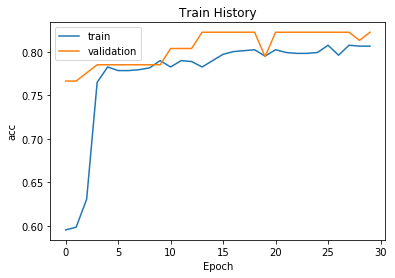

In [43]:
show_train_history(train_history,'acc','val_acc')

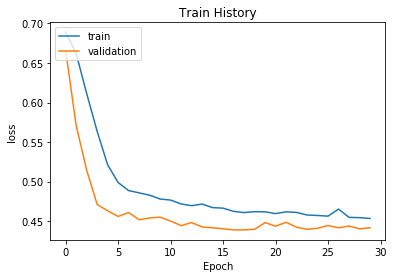

In [44]:
show_train_history(train_history,'loss','val_loss')

In [46]:
scores=model.evaluate(test_Features,test_Label)
print()
print('accuracy=',scores[1])

241/241 [==============================] - 0s 95us/step

accuracy= 0.8049792533593554


# Jack和Rose的数据

In [47]:
Jack=pd.Series([0,'Jack',3,'male',23,1,0,5.0000,'S'])
Rose=pd.Series([1,'Rose',1,'female',20,1,0,100.0000,'S'])

In [49]:
JR_df=pd.DataFrame([list(Jack),list(Rose)],columns=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked'])

In [50]:
all_df=pd.concat([all_df,JR_df])

In [51]:
all_features,Label=PreprocessData(all_df)

In [52]:
all_probability=model.predict(all_features)

In [53]:
all_probability[:10]

array([[0.9803068 ],
       [0.35044712],
       [0.9709362 ],
       [0.28152147],
       [0.9677032 ],
       [0.24732357],
       [0.92097634],
       [0.2605915 ],
       [0.90502703],
       [0.25111172]], dtype=float32)

In [54]:
pd=all_df
pd.insert(len(all_df.columns),'probability',all_probability)

In [55]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.151098
1,1,Rose,1,female,20.0,1,0,100.0,S,0.968319


In [56]:
pd[(pd['survived']==0)&(pd['probability']>0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.970936
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.967703
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.981394
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.976603
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.955001
